In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('health_screenings_2020_1000ea.xlsx')
data6 = data.loc[:,['gender', 'height', 'weight', 'waist', 'drinking', 'smoking']]
data6.loc[data6['gender']==1,['gender']]='Male'
data6.loc[data6['gender']==2,['gender']]='Female'
data6.loc[data6['drinking']==0,['drinking']]='Non-drinking'
data6.loc[data6['drinking']==1,['drinking']]='Drinking'
data6.loc[(data6['smoking']==1) | (data6['smoking']==2),['smoking']]='Non-smoking'
data6.loc[data6['smoking']==3,['smoking']]='Smoking'

In [11]:
drinking = data6.groupby(['gender', 'drinking'])['drinking'].count() #drinking 항목의 빈도를 세어서 시리즈를 생성
print(drinking)
smoking = data6.groupby(['gender', 'smoking'])['smoking'].count() #smoking 항목의 빈도를 세어서 시리즈를 생성
print(smoking)
#drinking = drinking.to_frame(name='gender')
drinking = drinking.to_frame(name='count') #시리즈를 데이터 프레임으로 변환: 'name' 매개변수를 통해 데이터프레임의 열 이름을 count로 설정 
#print(drinking)
smoking = smoking.to_frame(name='count') #시리즈를 데이터 프레임으로 변환: 'name' 매개변수를 통해 데이터프레임의 열 이름을 count로 설정 
drinking = drinking.reset_index() #데이터프레임을 재설정: 인덱스를 재설정하여 그룹화된 열들이 데이터프레임의 열로 이동할 수 있게 함 
print(drinking)
smoking = smoking.reset_index() #데이터프레임을 재설정: 인덱스를 재설정하여 그룹화된 열들이 데이터프레임의 열로 이동할 수 있게 함 
print(smoking)

gender  drinking    
Female  Drinking        213
        Non-drinking    305
Male    Drinking        356
        Non-drinking    126
Name: drinking, dtype: int64
gender  smoking    
Female  Non-smoking    500
        Smoking         18
Male    Non-smoking    321
        Smoking        161
Name: smoking, dtype: int64
   gender      drinking  count
0  Female      Drinking    213
1  Female  Non-drinking    305
2    Male      Drinking    356
3    Male  Non-drinking    126
   gender      smoking  count
0  Female  Non-smoking    500
1  Female      Smoking     18
2    Male  Non-smoking    321
3    Male      Smoking    161


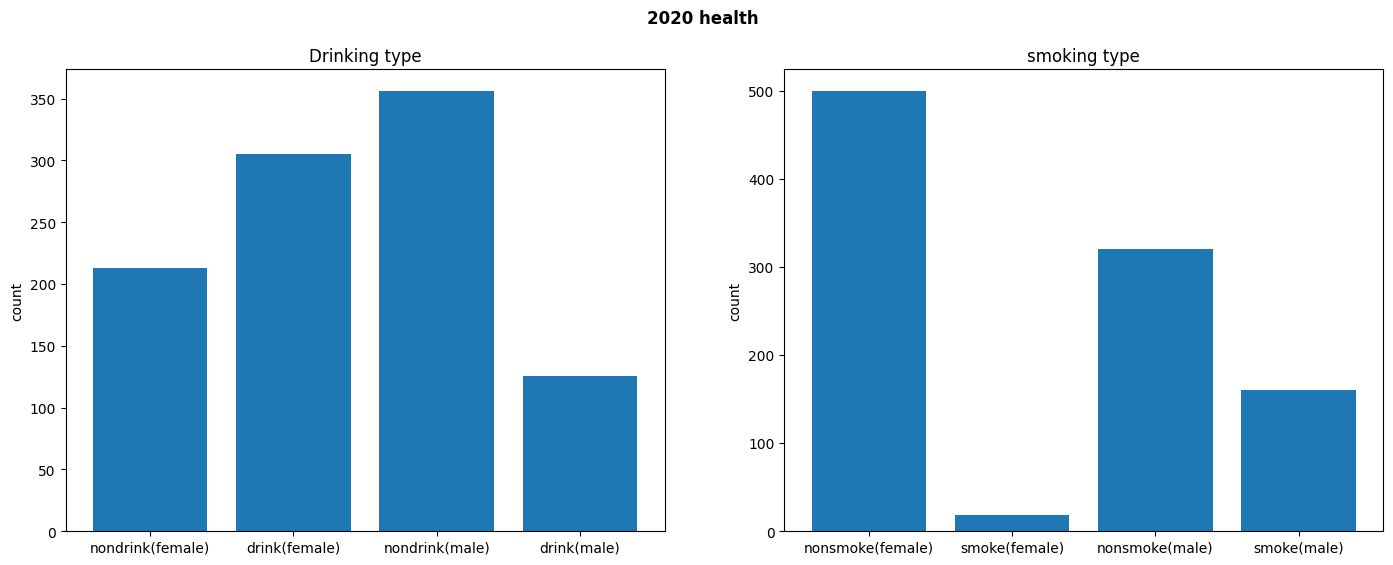

In [12]:
fig = plt.figure(figsize=(17,6))
fig.suptitle('2020 health',fontweight = 'bold')
index = np.arange(4)

fig.add_subplot(1,2,1)

plt.bar(index,drinking['count'])
plt.title('Drinking type')
plt.ylabel('count')
plt.xticks(index,['nondrink(female)','drink(female)','nondrink(male)','drink(male)'])

fig.add_subplot(1,2,2)

plt.bar(index,smoking['count'])
plt.title('smoking type')
plt.ylabel('count')
plt.xticks(index,['nonsmoke(female)','smoke(female)','nonsmoke(male)','smoke(male)'])

plt.show()

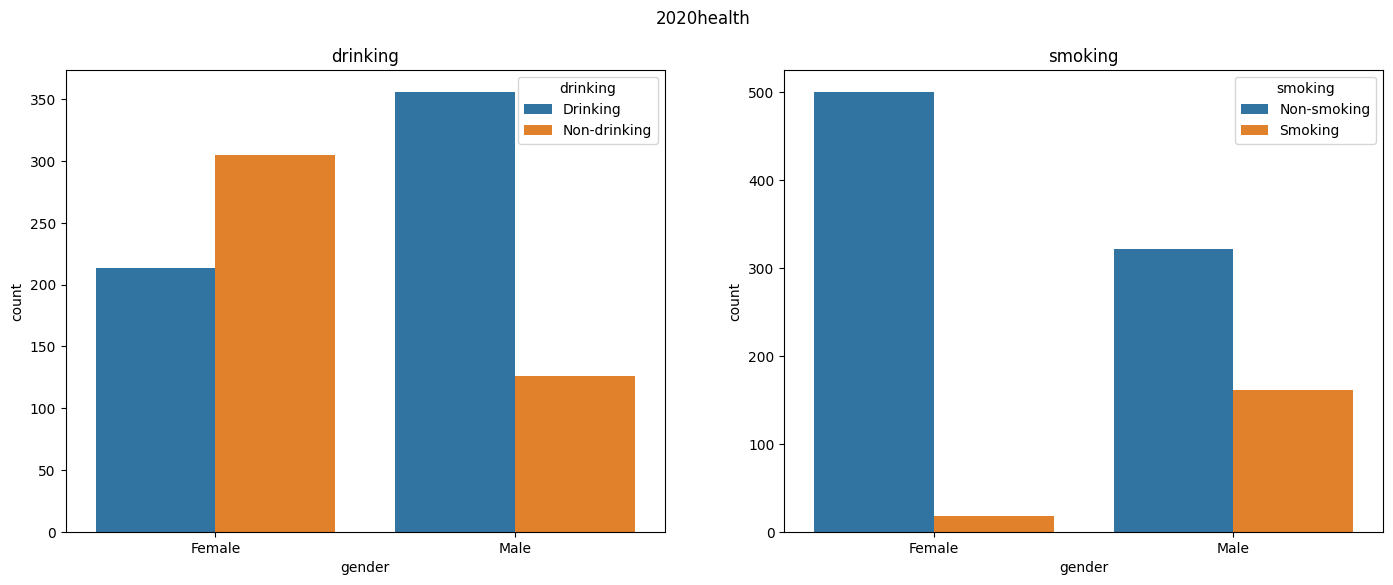

In [13]:
fig = plt.figure(figsize=(17,6))

area1 = fig.add_subplot(1,2,1)
area2 = fig.add_subplot(1,2,2)

ax1 = sns.barplot(data = drinking,x='gender',y='count',hue='drinking',ax=area1) #hue >> 그래프에서 더 많은 정보를 표시할 수 있음. legend와 비슷
ax2 = sns.barplot(data = smoking,x='gender',y='count',hue='smoking',ax=area2)

fig.suptitle('2020health')
area1.set_title('drinking')
area2.set_title('smoking')

plt.show()

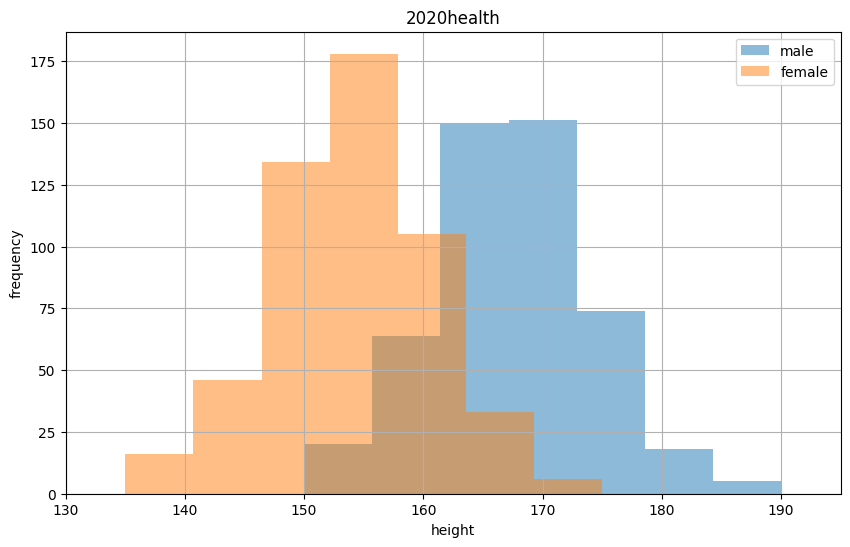

In [15]:
mdata = data.loc[data.gender == 1,['gender','height']]
fdata = data.loc[data.gender == 2,['gender','height']]

plt.figure(figsize= (10,6))
plt.hist(mdata['height'],bins=7,alpha = 0.5, label='male') #bins 는 그래프간의 간격이다 높을수록 벌어짐
plt.hist(fdata['height'],bins=7,alpha = 0.5, label='female') # alpha 는 투명도

plt.xlim(130,195)
plt.xlabel('height')
plt.ylabel('frequency')
plt.title('2020health')
plt.legend() #범례 
plt.grid()
plt.show()

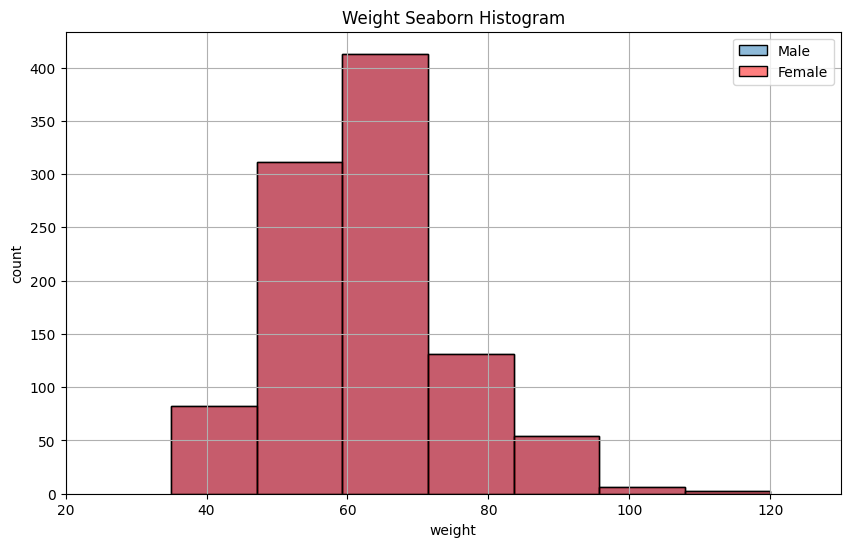

KeyError: 'waist'

<Figure size 1000x600 with 0 Axes>

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(data6['weight'], bins=7, alpha=0.5, label='Male')
sns.histplot(data6['weight'], bins=7, alpha=0.5, label='Female', color='r')

plt.xlim(20,130)
plt.xlabel('weight')
plt.ylabel('count')
plt.title('Weight Seaborn Histogram')
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(10,6))
sns.histplot(mdata['waist'], bins=7, alpha=0.5, label='Male', kde=True)
sns.histplot(fdata['waist'], bins=7, alpha=0.5, label='Female', color='r', kde=True)

plt.xlim(40,140)
plt.xlabel('waist')
plt.ylabel('count')
plt.title('Waist Seaborn Histogram - KDE(Kernel Density Estimator)')
plt.legend()
plt.grid()
plt.show()

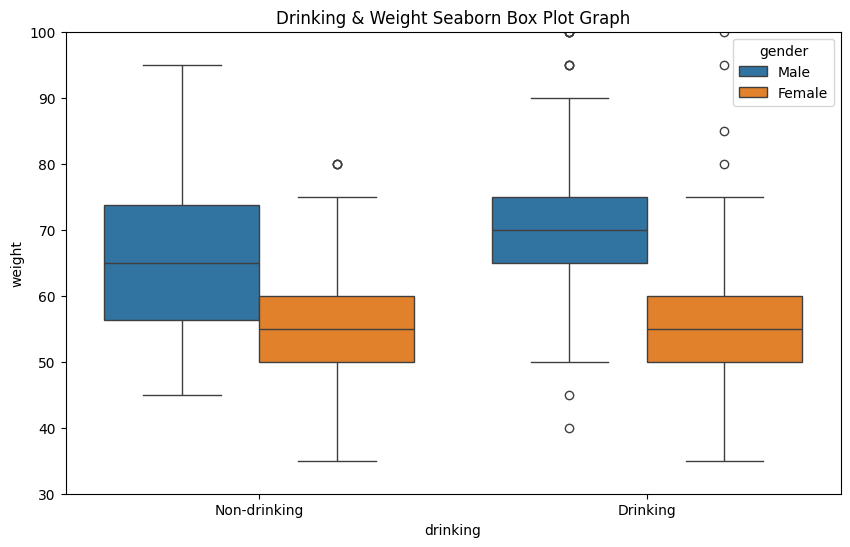

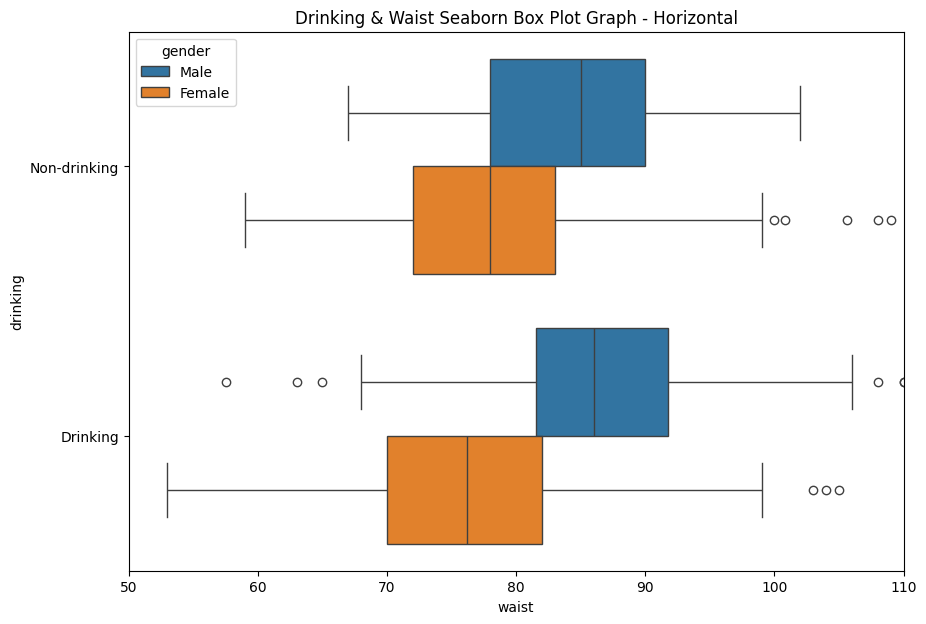

In [17]:
plt.figure(figsize=(10,6))
plt.title('Drinking & Weight Seaborn Box Plot Graph')

sns.boxplot(data=data6, x='drinking', y='weight', hue='gender')
plt.ylim(30,100)
plt.show()
plt.figure(figsize=(10,7))
plt.title('Drinking & Waist Seaborn Box Plot Graph - Horizontal')

sns.boxplot(data=data6, x='waist', y='drinking', hue='gender', orient='h')
plt.xlim(50,110)
plt.show()


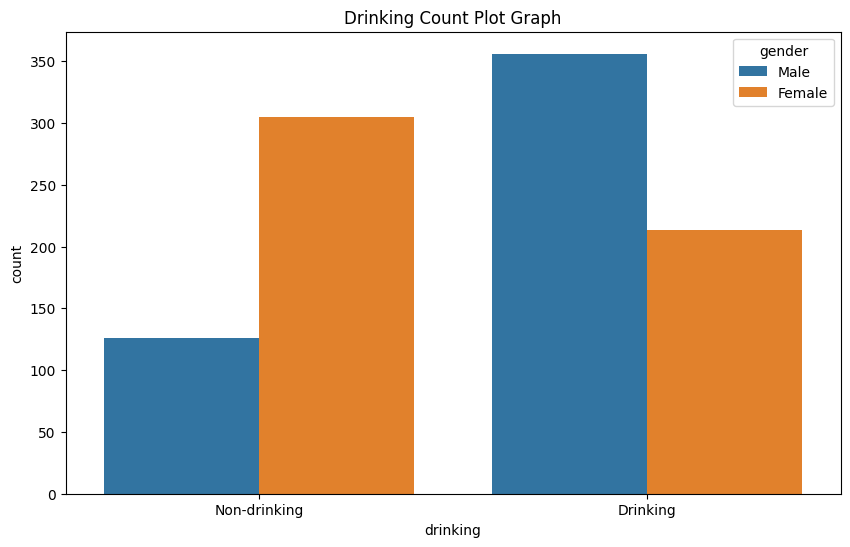

In [18]:
plt.figure(figsize=(10,6))
plt.title('Drinking Count Plot Graph')
sns.countplot(data=data6, x='drinking', hue='gender')
plt.show()

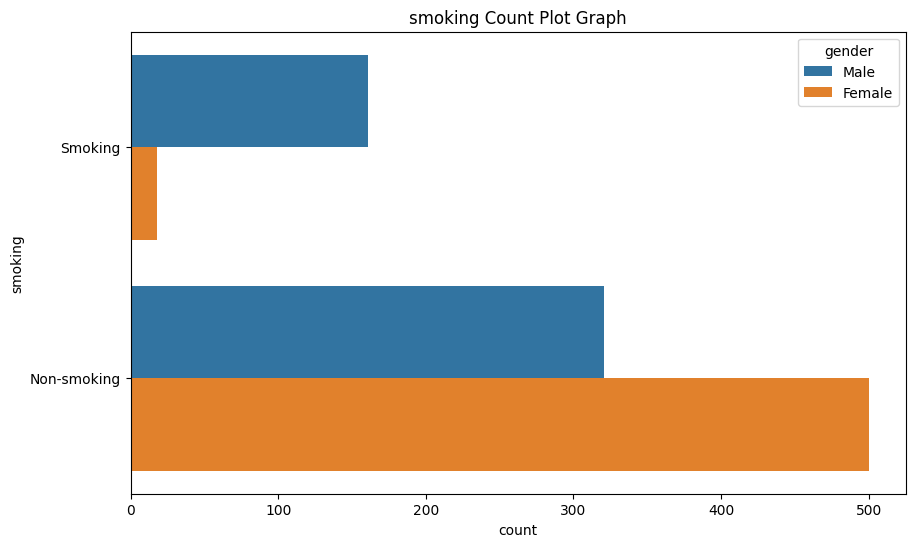

In [19]:
plt.figure(figsize=(10,6))
plt.title('smoking Count Plot Graph')
sns.countplot(data=data6,y='smoking',hue='gender',order=['Smoking','Non-smoking'])
plt.show()

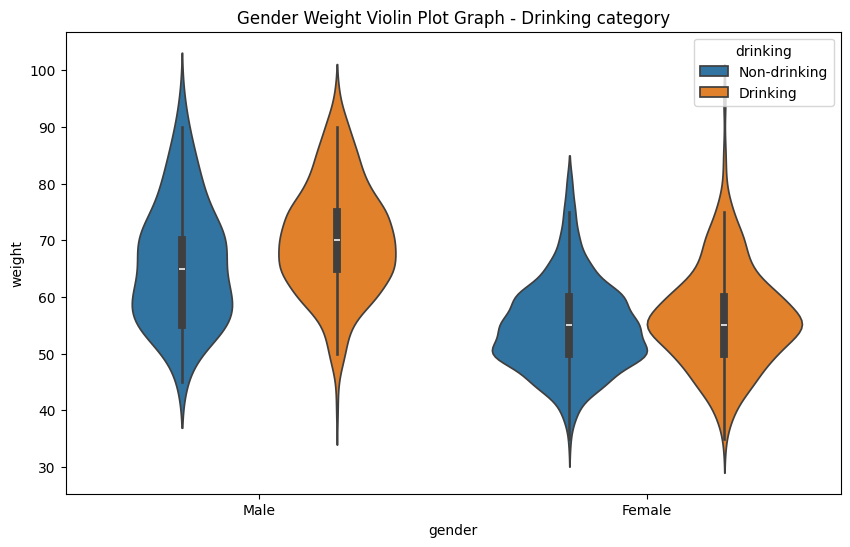

In [21]:
plt.figure(figsize=(10,6))
plt.title('Gender Weight Violin Plot Graph - Drinking category')
sns.violinplot(data=data6[data6.weight<100], x='gender', y='weight', hue='drinking')
plt.show()

In [22]:
data3 = data.loc[:,['gender','weight','waist']]
data8 = data.loc[:,['gender','weight','waist','drinking','smoking','cholesterol','HDL','LDL']]

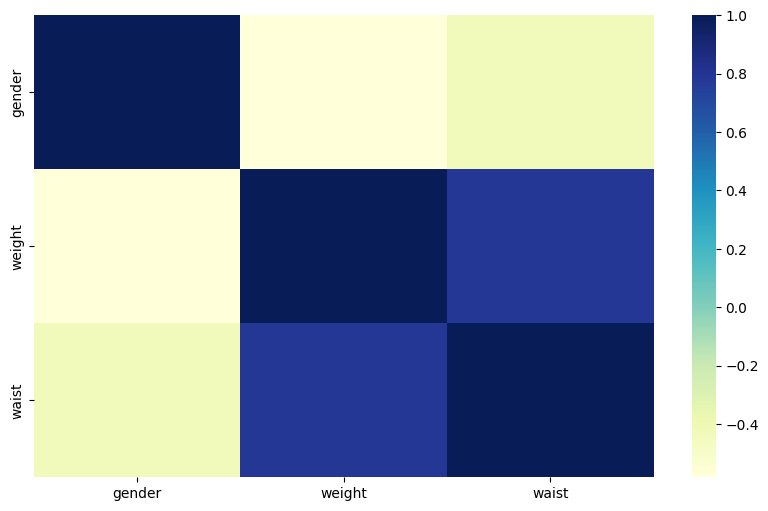

In [24]:
plt.figure(figsize=(10,6))

c_data3 = data3.corr()
sns.heatmap(c_data3,annot=True,cmap='YlGnBu') # annot 이 True이면 상관관계수치를 표시
plt.show()

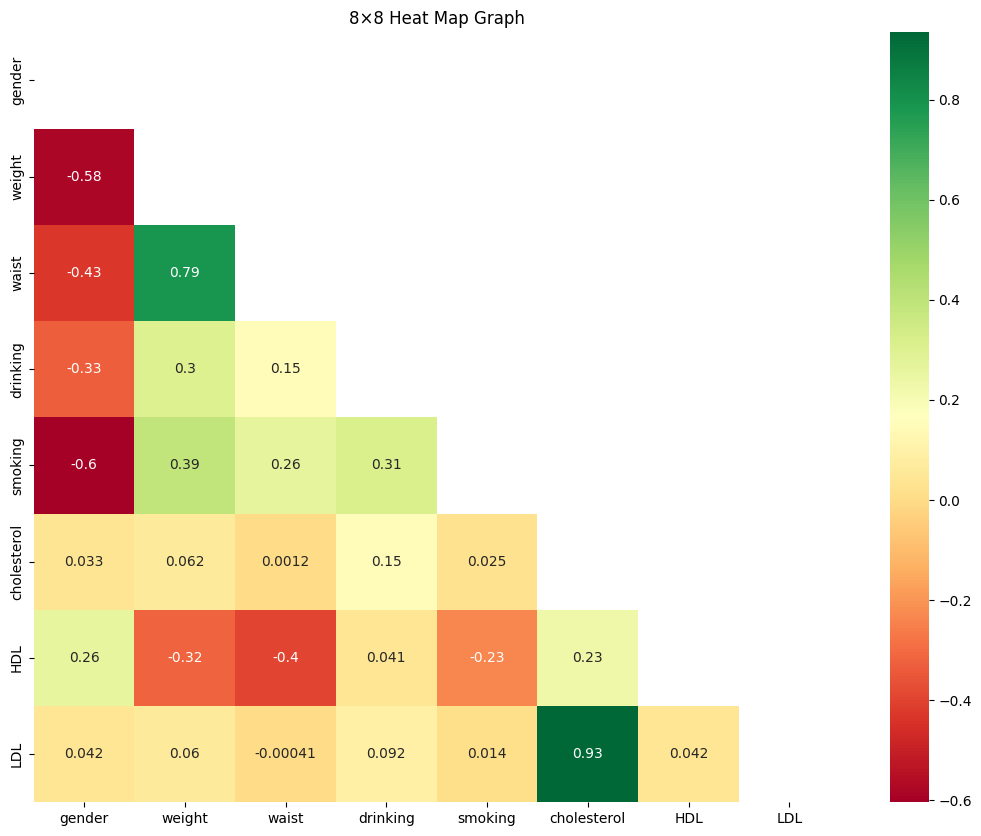

In [29]:
plt.figure(figsize=(13,10))
plt.title('8×8 Heat Map Graph')

correlation_data8= data8.corr()
upp_mat = np.triu(correlation_data8) #triu 함수 사용 시 오른쪽 상단영역을 안보이게 해줌

sns.heatmap(correlation_data8, annot=True, cmap='RdYlGn', mask=upp_mat) #mask옵션 해당 부분 가림
plt.show()

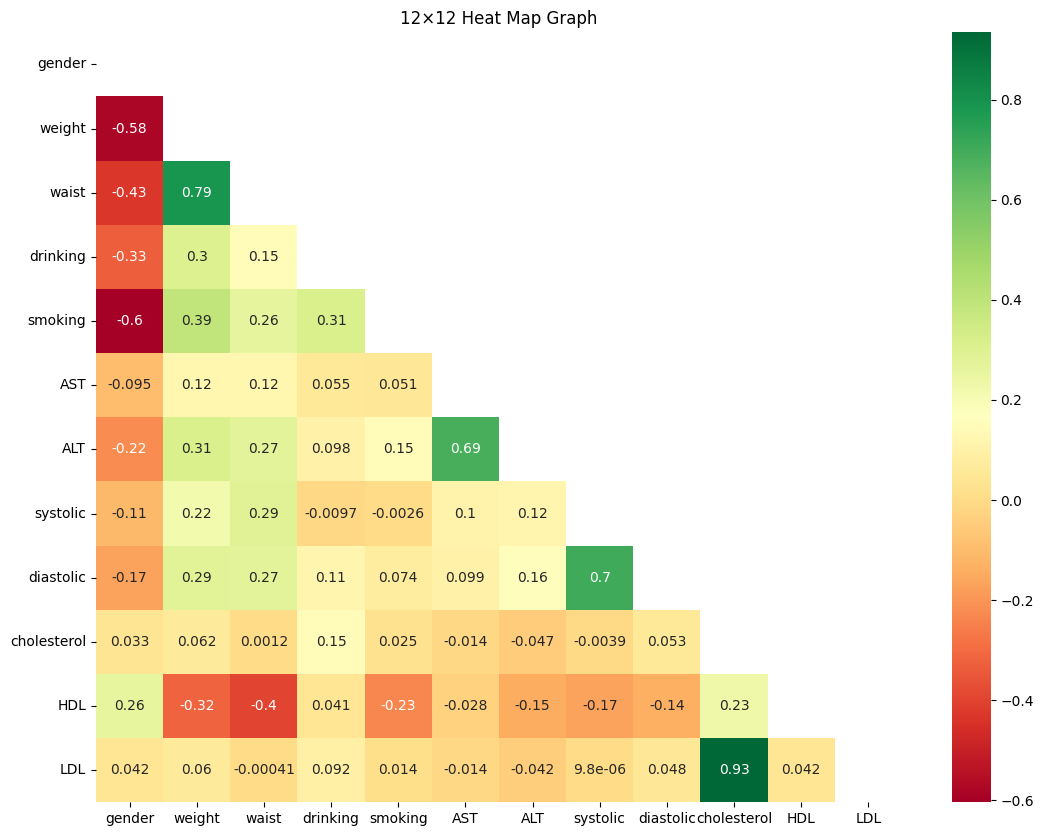

In [25]:
data12 = data.loc[:,['gender','weight','waist','drinking','smoking','AST','ALT','systolic','diastolic','cholesterol','HDL','LDL']]
plt.figure(figsize=(13,10))
plt.title('12×12 Heat Map Graph')

correlation_data12= data12.corr()
upp_mat = np.triu(correlation_data12)

sns.heatmap(correlation_data12, annot=True, cmap='RdYlGn', mask=upp_mat)
plt.show()

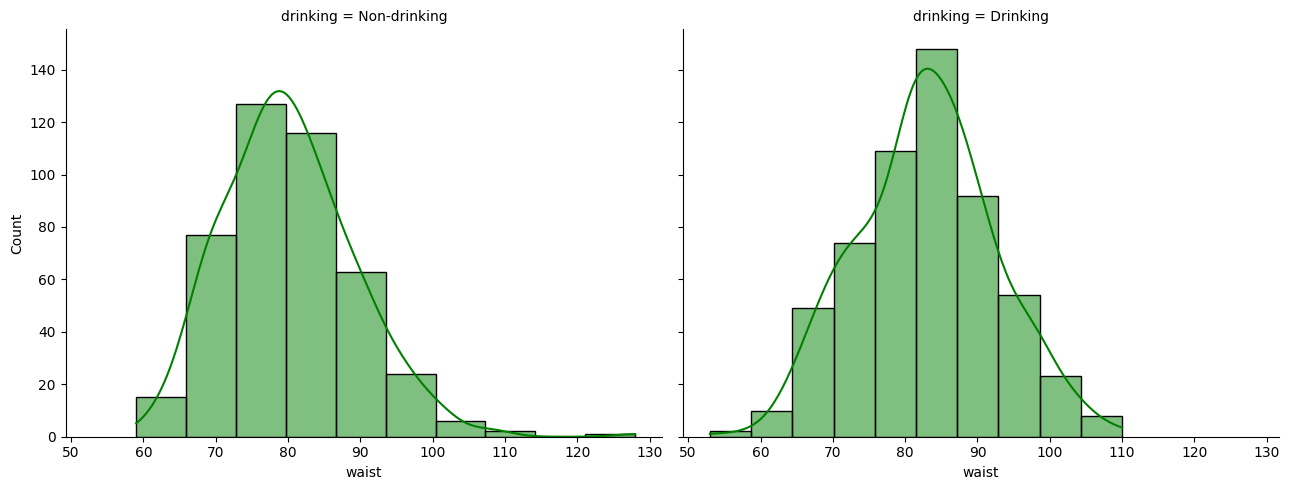

In [30]:
fg = sns.FacetGrid(data6, col='drinking', height=5, aspect=1.3)
fg.map(sns.histplot, 'waist', bins=10, color='g', kde=True)
plt.show()